In [4]:
###Raw Data before Wrangling and Cleaning
import pandas as pd
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sa = pd.read_csv("shark_attack.csv")
sa.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,13 Oct-223,2023.0,Questionable,USA,California,"Linda Mar, Pacific State Beach, San Mateo County",Surfing,male,M,52,...,NaN,CBS News. 10/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,...,NaN,"The Beat of Hawaii, 10/2/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,...,NaN,"SF Chronicle, 10/10/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,...,NaN,"C. Creswell, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#so, after putting our hypothesis we'll check how many columns we have and how many of them are irrelevant
sa.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [7]:
#we drop the columns that are useless to prove our hypothesis
sat=sa.drop(['Date', 'Year', 'Location','Name','Time', 'Species ','Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1','original order', 'Unnamed: 21', 'Unnamed: 22'], axis = 1)
display(sat)

,Type,Country,State,Activity,Sex,Age,Injury,Unnamed: 11
0,Questionable,USA,California,Surfing,M,52,Minor linjury to left lower leg,NaN
1,Unprovoked,USA,Hawaii,Surfing,F,45,Minor injury. Shark bit surfboard,N
2,Unprovoked,AUSTRALIA,South Australia,Swimming,F,64,Bite to foot and leg,N
3,Unprovoked,USA,California,Swimming,M,52,Body not recovered,Y
4,Unprovoked,USA,South Carolina,Swimming,M,NaN,Non-lifethreatening injuries,N
...,...,...,...,...,...,...,...,...
6925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop the row with null values for those columns
sat.dropna(subset=['Type','Country','Activity','Sex','Age','Injury','Unnamed: 11'], inplace=True, how='all')
sat

,Type,Country,State,Activity,Sex,Age,Injury,Unnamed: 11
0,Questionable,USA,California,Surfing,M,52,Minor linjury to left lower leg,NaN
1,Unprovoked,USA,Hawaii,Surfing,F,45,Minor injury. Shark bit surfboard,N
2,Unprovoked,AUSTRALIA,South Australia,Swimming,F,64,Bite to foot and leg,N
3,Unprovoked,USA,California,Swimming,M,52,Body not recovered,Y
4,Unprovoked,USA,South Carolina,Swimming,M,NaN,Non-lifethreatening injuries,N
...,...,...,...,...,...,...,...,...
6900,Unprovoked,AUSTRALIA,Western Australia,Diving,M,NaN,FATAL,Y
6901,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,M,NaN,FATAL,Y
6902,Unprovoked,USA,North Carolina,Swimming,M,NaN,FATAL,Y
6903,Unprovoked,PANAMA,NaN,NaN,M,NaN,FATAL,Y


In [9]:
###Dealing with duplicates
##looking and eleminating all duplicated even if they're few or none (like in this case)
sat.drop_duplicates()

,Type,Country,State,Activity,Sex,Age,Injury,Unnamed: 11
0,Questionable,USA,California,Surfing,M,52,Minor linjury to left lower leg,NaN
1,Unprovoked,USA,Hawaii,Surfing,F,45,Minor injury. Shark bit surfboard,N
2,Unprovoked,AUSTRALIA,South Australia,Swimming,F,64,Bite to foot and leg,N
3,Unprovoked,USA,California,Swimming,M,52,Body not recovered,Y
4,Unprovoked,USA,South Carolina,Swimming,M,NaN,Non-lifethreatening injuries,N
...,...,...,...,...,...,...,...,...
6897,Unprovoked,AUSTRALIA,NaN,Fishing,M,NaN,FATAL,Y
6900,Unprovoked,AUSTRALIA,Western Australia,Diving,M,NaN,FATAL,Y
6902,Unprovoked,USA,North Carolina,Swimming,M,NaN,FATAL,Y
6903,Unprovoked,PANAMA,NaN,NaN,M,NaN,FATAL,Y


In [10]:
#studying how much null values for each category so to know how to fill those values
sat.isnull().sum()

Type             18
Country          50
State           481
Activity        584
Sex             579
Age            2986
Injury           35
Unnamed: 11     562
dtype: int64

In [11]:
#filled the null in Age column with the mean() to not mess up the distribution
age_mean=round(sat['Age'].value_counts().mean(), 0)
sat['Age'].fillna(age_mean, inplace=True)

#since there are a lot of nulls in these we opted to fill it with they're imediates values in the data set
sat['Activity'].fillna(method='ffill', inplace=True)
sat['Sex'].fillna(method='ffill', inplace=True)
sat['Unnamed: 11'].fillna(method='bfill', inplace=True)
sat['Injury'].fillna(method='ffill', inplace=True)
sat['State'].fillna(method='ffill', inplace=True)

#use the most commun country in the dataset because they're not so much null for it to mess it's distribution
countrymode = mode(sat['Country'].values)
sat['Country'].fillna(countrymode, inplace=True)
typemode = mode(sat['Type'].values)
sat['Type'].fillna(countrymode, inplace=True)

#resetting it's indexes
sat.reset_index(drop=True, inplace=True)

In [12]:
#confirming there are no more null values to fill
sat.isnull().sum()

Type           0
Country        0
State          0
Activity       0
Sex            0
Age            0
Injury         0
Unnamed: 11    0
dtype: int64

In [13]:
#renaming an unnamed column to have the meaning of it showed in the table
sat = sat.rename(columns = {'Unnamed: 11':'Fatal'})

In [14]:
#asking for the dataset with no null values and renamed columns
display(sat)

,Type,Country,State,Activity,Sex,Age,Injury,Fatal
0,Questionable,USA,California,Surfing,M,52,Minor linjury to left lower leg,N
1,Unprovoked,USA,Hawaii,Surfing,F,45,Minor injury. Shark bit surfboard,N
2,Unprovoked,AUSTRALIA,South Australia,Swimming,F,64,Bite to foot and leg,N
3,Unprovoked,USA,California,Swimming,M,52,Body not recovered,Y
4,Unprovoked,USA,South Carolina,Swimming,M,23.0,Non-lifethreatening injuries,N
...,...,...,...,...,...,...,...,...
6900,Unprovoked,AUSTRALIA,Western Australia,Diving,M,23.0,FATAL,Y
6901,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,M,23.0,FATAL,Y
6902,Unprovoked,USA,North Carolina,Swimming,M,23.0,FATAL,Y
6903,Unprovoked,PANAMA,North Carolina,Swimming,M,23.0,FATAL,Y


In [15]:
sat["Activity"].value_counts()[:3]

Activity
Surfing     1176
Swimming    1078
Fishing      540
Name: count, dtype: int64

# Hypothesis

<BarContainer object of 2 artists>

There are more men victims than women.
There were 6077 men victims and 826 women.
That represents 88.03 % of total victims


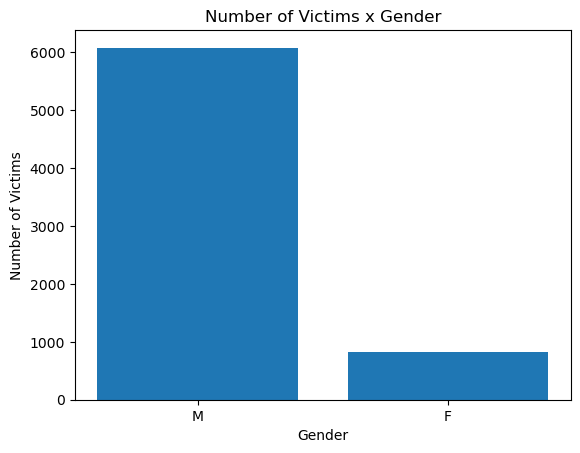

In [16]:
###1. There are more men or women victims?

#which values do we have in column Sex
sat['Sex'].unique()

#unifyin equal value, for example: 'M ' == 'M'
sat['Sex']=sat['Sex'].replace(['M', ' M', 'M ', 'M x 2', 'N'], 'M')

plt.xlabel("Gender") #nome eixo x
plt.ylabel("Number of Victims") #nome eixo y
plt.title("Number of Victims x Gender") #titulo gráfico
display(plt.bar(sat['Sex'].value_counts().index[:2], sat['Sex'].value_counts()[:2]))

total_victims = sat['Sex'].value_counts()[0] + sat['Sex'].value_counts()[1]
men_victims = sat['Sex'].value_counts()[0]
women_victims = sat['Sex'].value_counts()[1]
men_perc = round(men_victims/total_victims, 4) * 100
women_perc = round(women_victims/total_victims, 4) * 100

if men_victims > women_victims:
    print("There are more men victims than women.")
    print("There were", men_victims, "men victims and", women_victims, "women.")
    print("That represents", men_perc, "% of total victims")
elif sat['Sex'].value_counts()[1] > sat['Sex'].value_counts()[0]:
    print("There are more women victims than men.")
    print("There were", women_victims, "women victims and", men_victims, "men.")
    print("That represents", women_perc, "% of total victims")
else:
    print("There are equal accidents betwenn women and men.")
    


Majority of incidente were not fatal.
There were 5208 not fatal incidents and 1595 fatal incidents.
That represents 76.6 % of total victims.


<BarContainer object of 2 artists>

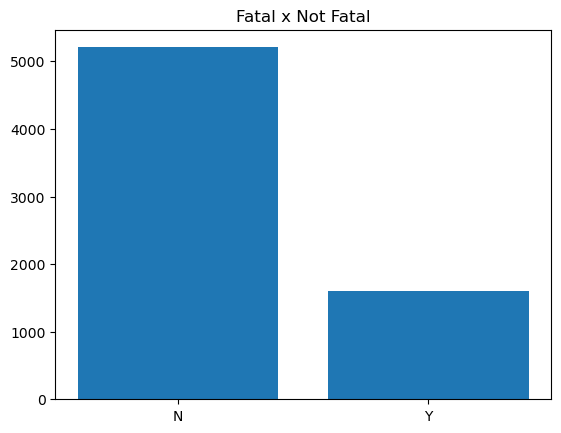

In [17]:
###2. Most of the attacks are fatal

plt.title('Fatal x Not Fatal')

#filterling the values so we only have to: "Y" and "N"
filtered_ds = sat[sat["Fatal"].isin(["Y", "N"])]

notfatal = sat["Fatal"].value_counts()[0]
fatal = sat["Fatal"].value_counts()[1]
totalincidents = fatal + notfatal
perc_fatal = round(fatal / totalincidents, 3) * 100
perc_notfatal = round(notfatal / totalincidents, 3) * 100

if notfatal > fatal:
    print("Majority of incidente were not fatal.")
    print("There were", notfatal, "not fatal incidents and", fatal, "fatal incidents.")
    print("That represents", perc_notfatal, "% of total victims.")
elif fatal > notfatal:
    print("Majority of incidente were fatal.")
    print("There were", fatal, "not fatal incidents and", notfatal, "fatal incidents.")
    print("That represents", perc_fatal, "% of total victims.")
else:
    print("There are equal accidents betwenn women and men.")
    
#showing bar
display(plt.bar(filtered_ds['Fatal'].value_counts().index, filtered_ds['Fatal'].value_counts()))

<BarContainer object of 3 artists>

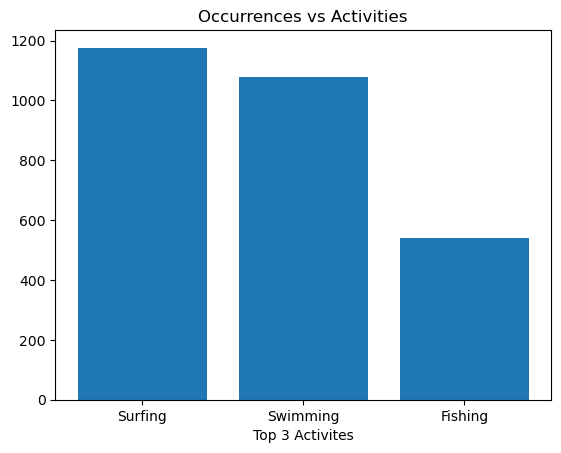

In [18]:
###3. The activity with the most incidents is a sport

#identifying top 3 activities
top3act = sat['Activity'].value_counts()[0:3]

#setting the plot
plt.xlabel('Top 3 Activites')
plt.title('Occurrences vs Activities')

plt.bar(top3act.index, top3act)

0.46475600309837334


<BarContainer object of 3 artists>

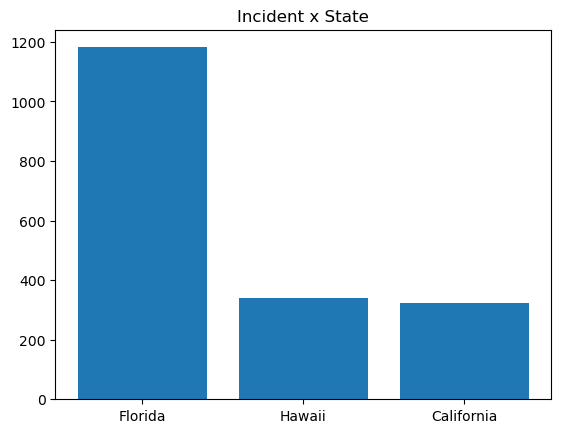

In [19]:
###4. California is the State in the US with more incidents

#creating a data set filtering for USA
usasat=sat[sat['Country']=='USA']

#identifying which 3 states have more incidents
top3st = usasat['State'].value_counts()[:3]
print(1200/usasat.value_counts().sum())

#ploting it
plt.title("Incident x State")
plt.bar(top3st.index, top3st)

In [20]:
###5. 75% occur with people younger than 25
florida = sat[(sat['Country'] == 'USA') & (sat['State'] == 'Florida')] 
florida['Age'].value_counts().mean()

12.989010989010989

In [22]:
## Export the cleaned data

sa.to_csv('shark_attack_cleaned.csv')